# Deep Learning Based Diabetes Risk Analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('dataset/diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

**Visualization**

In [10]:
count_diabetes=df['Outcome'].value_counts()
count_diabetes

0    500
1    268
Name: Outcome, dtype: int64

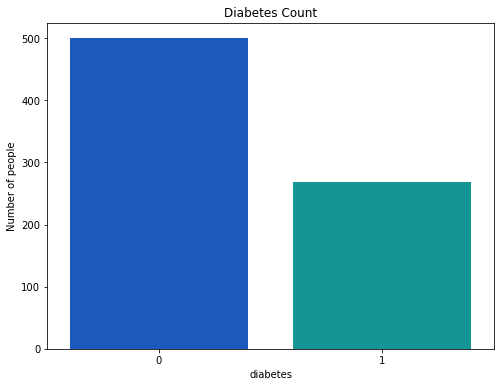

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=count_diabetes.index,y=count_diabetes.values,palette='winter')
plt.title('Diabetes Count')
plt.xlabel('diabetes')
plt.ylabel('Number of people')
plt.show()

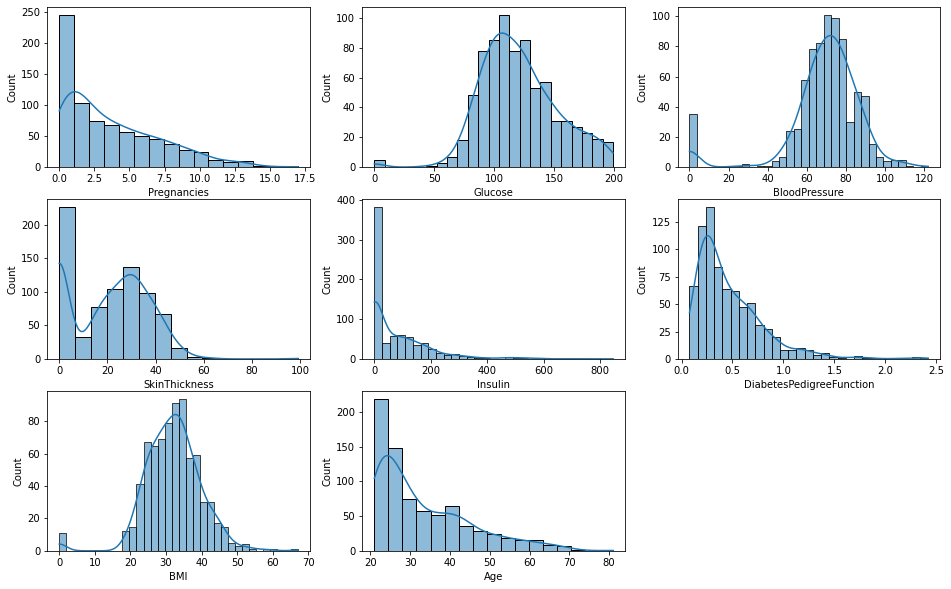

In [20]:
plt.figure(figsize=(16,10))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','BMI','Age']):
    plt.subplot(3,3,i+1)
    sns.histplot(x=col,data=df,kde=True)
plt.show()

In [22]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


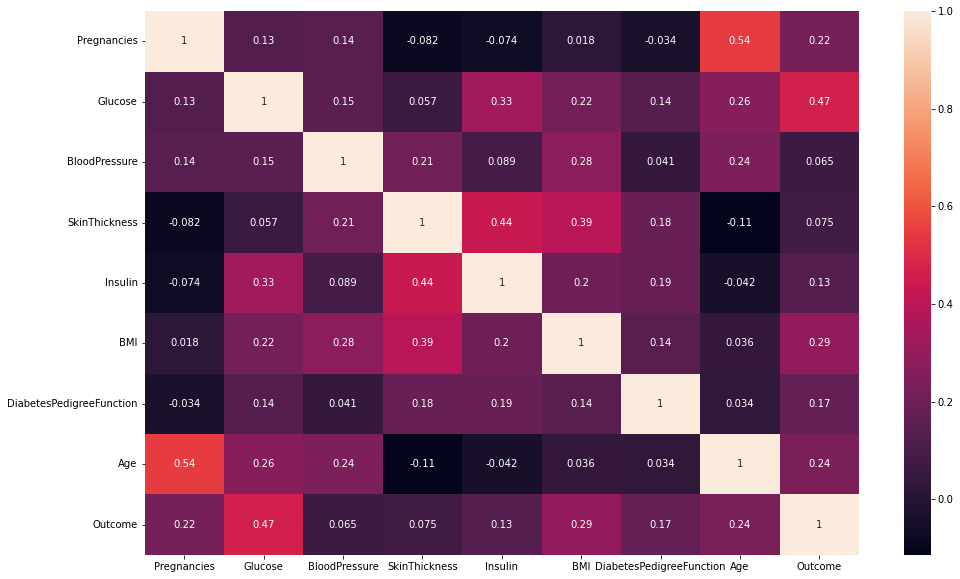

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Definining features and target

In [24]:
X=df.iloc[:,:-1]
Y=df['Outcome']

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
Y=Y.values.reshape(-1,1)
#Y

# Data Scaling

In [28]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X.shape

(768, 8)

# Train, test split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

In [30]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(691, 8) (77, 8) (691, 1) (77, 1)


# CNN

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

# Define the model
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=600, batch_size=16)



Epoch 1/600


C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6024 - loss: 0.6720
Epoch 2/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 0.6351
Epoch 3/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 0.5828
Epoch 4/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.5854
Epoch 5/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7391 - loss: 0.5506
Epoch 6/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7534 - loss: 0.5194
Epoch 7/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7352 - loss: 0.4950
Epoch 8/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.4820
Epoch 9/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7696 - loss: 0.4711
Epoch 10/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7494 - loss: 0.4862
Epoch 11/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.4577
Epoch 12/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - lo

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4237
Epoch 70/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.3493
Epoch 71/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.3751
Epoch 72/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.3701
Epoch 73/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3303
Epoch 74/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.3596
Epoch 75/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8280 - loss: 0.3704
Epoch 76/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3537
Epoch 77/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8424 - loss: 0.3411
Epoch 78/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3247
Epoch 79/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3430
Epoch 80/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9311 - loss: 0.1570
Epoch 138/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9163 - loss: 0.1816
Epoch 139/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.1751
Epoch 140/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9354 - loss: 0.1518
Epoch 141/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1194
Epoch 142/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1034
Epoch 143/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.1223
Epoch 144/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9565 - loss: 0.1125
Epoch 145/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.1681
Epoch 146/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 0.1493
Epoch 147/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.1342
Epoch 148/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0479
Epoch 205/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9265 - loss: 0.3111
Epoch 206/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9315 - loss: 0.1794
Epoch 207/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.0998
Epoch 208/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.0793
Epoch 209/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9874 - loss: 0.0651
Epoch 210/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9863 - loss: 0.0391
Epoch 211/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9313 - loss: 0.2030
Epoch 212/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.1102
Epoch 213/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0593
Epoch 214/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9873 - loss: 0.0382
Epoch 215/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.0724
Epoch 272/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0237
Epoch 273/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.0147
Epoch 274/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0188
Epoch 275/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0137
Epoch 276/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0127
Epoch 277/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0129
Epoch 278/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0091
Epoch 279/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0098
Epoch 280/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0119
Epoch 281/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0082
Epoch 282/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0034   
Epoch 339/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0046
Epoch 340/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0029
Epoch 341/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042   
Epoch 342/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 343/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0045
Epoch 344/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0027   
Epoch 345/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0025
Epoch 346/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 347/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0028   
Epoch 348/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0027   
Epoch 349/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0266
Epoch 406/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0124
Epoch 407/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.0107
Epoch 408/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0071
Epoch 409/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0079
Epoch 410/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0048   
Epoch 411/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042
Epoch 412/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 413/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031   
Epoch 414/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0082
Epoch 415/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0021
Epoch 416/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1103
Epoch 473/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0179
Epoch 474/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0102
Epoch 475/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 476/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0053
Epoch 477/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0035   
Epoch 478/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0034
Epoch 479/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 480/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0051
Epoch 481/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 482/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0039   
Epoch 483/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0176
Epoch 540/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0110
Epoch 541/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0108
Epoch 542/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0127
Epoch 543/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 544/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0055
Epoch 545/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 546/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0049
Epoch 547/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 548/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0052
Epoch 549/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0028   
Epoch 550/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [32]:
Y_pred = model.predict(X).round()
cm=confusion_matrix(Y, Y_pred)

print(classification_report(Y, Y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       500
           1       0.95      0.95      0.95       268

    accuracy                           0.97       768
   macro avg       0.96      0.96      0.96       768
weighted avg       0.97      0.97      0.97       768



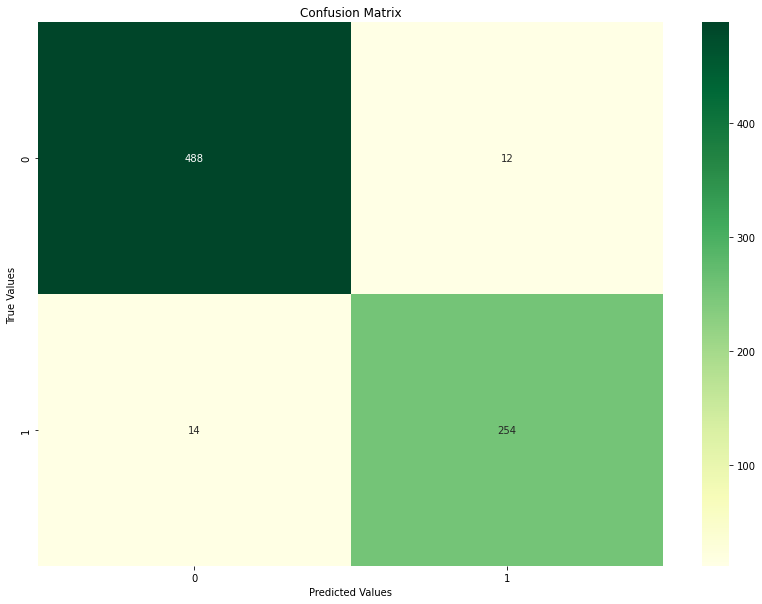

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

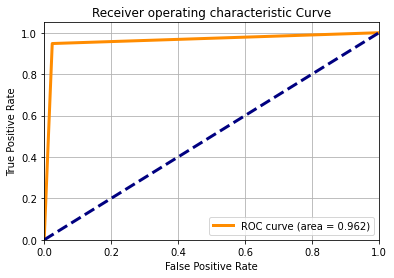

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
Y = label_binarize(Y, classes=[0, 1])

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(Y.ravel(), Y_pred.ravel())

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [35]:
sem = np.std(model.predict(X), axis=0) / np.sqrt(len(model.predict(X)))

print(sem)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step
[0.01707554]


# LSTM

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

# Define the model
model2 = Sequential()

# Add the LSTM layers
model2.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model2.add(Dropout(0.2))

model2.add(LSTM(units=64, return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(units=32))
model2.add(Dropout(0.2))

# Add the output layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(X_train, Y_train, epochs=600, batch_size=16)



Epoch 1/600


C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6214 - loss: 0.6718
Epoch 2/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6613 - loss: 0.6497
Epoch 3/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6700 - loss: 0.5994
Epoch 4/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7039 - loss: 0.5820
Epoch 5/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6954 - loss: 0.6280
Epoch 6/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7135 - loss: 0.5679
Epoch 7/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7606 - loss: 0.5309
Epoch 8/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7225 - loss: 0.5599
Epoch 9/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6873 - loss: 0.5940
Epoch 10/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6999 - loss: 0.5779
Epoch 11/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7175 - loss: 0.5526
Epoch 12/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7203 - lo

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7577 - loss: 0.5012
Epoch 70/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7208 - loss: 0.5113
Epoch 71/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7705 - loss: 0.4824
Epoch 72/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7644 - loss: 0.4647
Epoch 73/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7402 - loss: 0.4784
Epoch 74/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7688 - loss: 0.4764
Epoch 75/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7667 - loss: 0.4612
Epoch 76/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7423 - loss: 0.4930
Epoch 77/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7636 - loss: 0.4781
Epoch 78/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7573 - loss: 0.4669
Epoch 79/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7761 - loss: 0.4399
Epoch 80/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7960 - loss: 0.4193
Epoch 138/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7832 - loss: 0.4264
Epoch 139/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7963 - loss: 0.4116
Epoch 140/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7635 - loss: 0.4418
Epoch 141/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.4617
Epoch 142/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8011 - loss: 0.4177
Epoch 143/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7967 - loss: 0.4265
Epoch 144/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7764 - loss: 0.4473
Epoch 145/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7941 - loss: 0.4554
Epoch 146/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8046 - loss: 0.4416
Epoch 147/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7722 - loss: 0.4447
Epoch 148/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8148 - loss: 0.3794
Epoch 205/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8103 - loss: 0.3686
Epoch 206/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.4065
Epoch 207/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8145 - loss: 0.3666
Epoch 208/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.3394
Epoch 209/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8097 - loss: 0.4005
Epoch 210/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8217 - loss: 0.3869
Epoch 211/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8479 - loss: 0.3661
Epoch 212/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8286 - loss: 0.3968
Epoch 213/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.3665
Epoch 214/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.3681
Epoch 215/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8461 - loss: 0.3285
Epoch 272/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8216 - loss: 0.3495
Epoch 273/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8676 - loss: 0.2924
Epoch 274/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8627 - loss: 0.3143
Epoch 275/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8923 - loss: 0.2551
Epoch 276/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8632 - loss: 0.3292
Epoch 277/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8642 - loss: 0.3081
Epoch 278/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8718 - loss: 0.3014
Epoch 279/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.2955
Epoch 280/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8406 - loss: 0.3116
Epoch 281/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8549 - loss: 0.3237
Epoch 282/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9166 - loss: 0.2018
Epoch 339/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9053 - loss: 0.2515
Epoch 340/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8880 - loss: 0.2564
Epoch 341/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9017 - loss: 0.2326
Epoch 342/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.2461
Epoch 343/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9107 - loss: 0.2324
Epoch 344/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9261 - loss: 0.2378
Epoch 345/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.2014
Epoch 346/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8631 - loss: 0.2789
Epoch 347/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2120
Epoch 348/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9336 - loss: 0.1737
Epoch 349/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9374 - loss: 0.1329
Epoch 406/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9121 - loss: 0.1883
Epoch 407/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9202 - loss: 0.1851
Epoch 408/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.1312
Epoch 409/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9458 - loss: 0.1035
Epoch 410/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9497 - loss: 0.1072
Epoch 411/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9416 - loss: 0.1181
Epoch 412/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9456 - loss: 0.1323
Epoch 413/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9448 - loss: 0.1442
Epoch 414/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9442 - loss: 0.1737
Epoch 415/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9350 - loss: 0.1275
Epoch 416/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9673 - loss: 0.0886
Epoch 473/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9556 - loss: 0.1105
Epoch 474/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9687 - loss: 0.0805
Epoch 475/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9775 - loss: 0.0598
Epoch 476/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.0875
Epoch 477/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0735
Epoch 478/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9867 - loss: 0.0467
Epoch 479/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9819 - loss: 0.0600
Epoch 480/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9618 - loss: 0.1052
Epoch 481/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.2372
Epoch 482/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9668 - loss: 0.1150
Epoch 483/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9933 - loss: 0.0341
Epoch 540/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9920 - loss: 0.0400
Epoch 541/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.0518
Epoch 542/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9886 - loss: 0.0403
Epoch 543/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9768 - loss: 0.0704
Epoch 544/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9660 - loss: 0.1027
Epoch 545/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9661 - loss: 0.1092
Epoch 546/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.0577
Epoch 547/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9679 - loss: 0.1058
Epoch 548/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9830 - loss: 0.0523
Epoch 549/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9805 - loss: 0.0651
Epoch 550/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - ac

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.95      0.93      0.94       268

    accuracy                           0.96       768
   macro avg       0.96      0.95      0.96       768
weighted avg       0.96      0.96      0.96       768



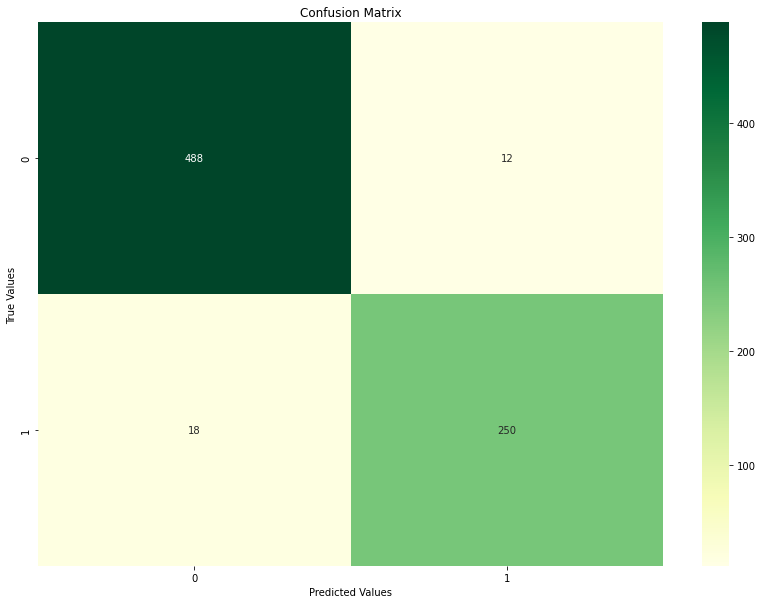

In [45]:
Y_pred = model2.predict(X).round()
cm=confusion_matrix(Y, Y_pred)
#print('Confusion Matrix:\n', cm)

print(classification_report(Y, Y_pred))


plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()




In [39]:
sem = np.std(model2.predict(X), axis=0) / np.sqrt(len(model2.predict(X)))

print(sem)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0.0168207]


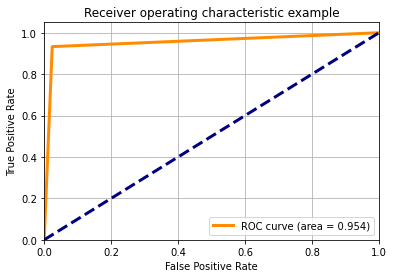

In [40]:
# Binarize the output
Y = label_binarize(Y, classes=[0, 1])

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(Y.ravel(), Y_pred.ravel())

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


# Transfer Learning

In [72]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.utils import to_categorical

# Split the dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=10)

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, to_categorical(Y_train), epochs=600, batch_size=16)

# Evaluate the model
scores = model.evaluate(X_test, to_categorical(Y_test), verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

# Transfer Learning
new_model = Sequential()

# Add layers from the old model to the new model, except the last Dense layer
for layer in model.layers[:-1]:
    new_model.add(layer)

# Add new layers for transfer learning
new_model.add(Dense(100, activation='relu'))
new_model.add(Dense(2, activation='softmax'))

# Compile the new model
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the new model
new_model.fit(X_train, to_categorical(Y_train), epochs=600, batch_size=16)

# Evaluate the new model
scores = new_model.evaluate(X_test, to_categorical(Y_test), verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Epoch 1/600


C:\Users\lenovo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - accuracy: 0.6599 - loss: 0.6653 
Epoch 2/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6264 - loss: 0.6536 
Epoch 3/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6408 - loss: 0.6308
Epoch 4/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.6496 - loss: 0.6073
Epoch 5/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7130 - loss: 0.5592
Epoch 6/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7212 - loss: 0.5536
Epoch 7/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7641 - loss: 0.5093
Epoch 8/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7447 - loss: 0.5000
Epoch 9/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.7501 - loss: 0.4953
Epoch 10/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7557 - loss: 0.4990
Epoch 11/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7683 - loss: 0.4696 
Epoch 12/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7978 - loss: 0.4110
Epoch 69/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8030 - loss: 0.4174 
Epoch 70/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8126 - loss: 0.4382
Epoch 71/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.7916 - loss: 0.4185
Epoch 72/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8039 - loss: 0.4174
Epoch 73/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8002 - loss: 0.4322
Epoch 74/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8028 - loss: 0.4137
Epoch 75/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8240 - loss: 0.3864
Epoch 76/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7727 - loss: 0.4392
Epoch 77/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.7571 - loss: 0.4563
Epoch 78/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.7894 - loss: 0.4444
Epoch 79/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8198 - loss: 0.3718
Epoch 136/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8294 - loss: 0.3837
Epoch 137/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8037 - loss: 0.4081
Epoch 138/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8105 - loss: 0.3784
Epoch 139/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8349 - loss: 0.3830
Epoch 140/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8206 - loss: 0.4024
Epoch 141/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8368 - loss: 0.3795
Epoch 142/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.8132 - loss: 0.3936
Epoch 143/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8317 - loss: 0.3737
Epoch 144/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8471 - loss: 0.3440
Epoch 145/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8136 - loss: 0.4001
Epoch 146/600
44/44 ━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8349 - loss: 0.3480
Epoch 202/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8520 - loss: 0.3413
Epoch 203/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8412 - loss: 0.3604
Epoch 204/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8406 - loss: 0.3555
Epoch 205/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8694 - loss: 0.3408
Epoch 206/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.8109 - loss: 0.3842
Epoch 207/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8544 - loss: 0.3658
Epoch 208/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8599 - loss: 0.3253
Epoch 209/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8246 - loss: 0.3658 
Epoch 210/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8517 - loss: 0.3355 
Epoch 211/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3500 
Epoch 212/600
44/44 ━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8412 - loss: 0.3375
Epoch 268/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8629 - loss: 0.3099
Epoch 269/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8299 - loss: 0.3499
Epoch 270/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8577 - loss: 0.3210
Epoch 271/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8512 - loss: 0.3308
Epoch 272/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8635 - loss: 0.3143
Epoch 273/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8699 - loss: 0.3077
Epoch 274/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8461 - loss: 0.3595
Epoch 275/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8355 - loss: 0.3424
Epoch 276/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8691 - loss: 0.3193
Epoch 277/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8709 - loss: 0.3133
Epoch 278/600
44/44 ━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8591 - loss: 0.2952
Epoch 334/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8887 - loss: 0.2862
Epoch 335/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8669 - loss: 0.3069
Epoch 336/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8554 - loss: 0.3148
Epoch 337/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8532 - loss: 0.3107
Epoch 338/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8600 - loss: 0.3043
Epoch 339/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8836 - loss: 0.2890
Epoch 340/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8946 - loss: 0.2638
Epoch 341/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8842 - loss: 0.2874
Epoch 342/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8755 - loss: 0.2752
Epoch 343/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.8733 - loss: 0.2877
Epoch 344/600
44/44 ━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8668 - loss: 0.3014
Epoch 400/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8944 - loss: 0.2682
Epoch 401/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8809 - loss: 0.2845
Epoch 402/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8707 - loss: 0.2678
Epoch 403/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8667 - loss: 0.2983
Epoch 404/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8779 - loss: 0.3031
Epoch 405/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.8828 - loss: 0.3055
Epoch 406/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8797 - loss: 0.2783
Epoch 407/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8875 - loss: 0.2798
Epoch 408/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8446 - loss: 0.3238
Epoch 409/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8835 - loss: 0.2611
Epoch 410/600
44/44 ━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.2874
Epoch 466/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.8960 - loss: 0.2615
Epoch 467/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8937 - loss: 0.2499
Epoch 468/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8873 - loss: 0.2472
Epoch 469/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8941 - loss: 0.2604
Epoch 470/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8945 - loss: 0.2489
Epoch 471/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9118 - loss: 0.2347
Epoch 472/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9144 - loss: 0.2305
Epoch 473/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2356 
Epoch 474/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8821 - loss: 0.2941
Epoch 475/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8914 - loss: 0.2594
Epoch 476/600
44/44 ━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9135 - loss: 0.2335
Epoch 532/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8880 - loss: 0.2625
Epoch 533/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8917 - loss: 0.2342
Epoch 534/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8954 - loss: 0.2419
Epoch 535/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9083 - loss: 0.2416
Epoch 536/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8851 - loss: 0.2452
Epoch 537/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8937 - loss: 0.2492
Epoch 538/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9227 - loss: 0.2208
Epoch 539/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.8878 - loss: 0.2483
Epoch 540/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9138 - loss: 0.2283
Epoch 541/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9103 - loss: 0.2292
Epoch 542/600
44/44 ━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9021 - loss: 0.2284
Epoch 598/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9176 - loss: 0.2133
Epoch 599/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.9167 - loss: 0.2408
Epoch 600/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9173 - loss: 0.2128
Accuracy: 74.03%
Epoch 1/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7076 - loss: 0.5600   
Epoch 2/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7699 - loss: 0.4650 
Epoch 3/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8177 - loss: 0.4041
Epoch 4/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8218 - loss: 0.4012
Epoch 5/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8140 - loss: 0.3743 
Epoch 6/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.8615 - loss: 0.3436
Epoch 7/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8661 - loss: 0.3294
Epoch 8/600
44/44 ━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9443 - loss: 0.1545
Epoch 65/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9255 - loss: 0.2020
Epoch 66/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9236 - loss: 0.1635
Epoch 67/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9367 - loss: 0.1470
Epoch 68/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9408 - loss: 0.1752
Epoch 69/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9475 - loss: 0.1505 
Epoch 70/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9638 - loss: 0.1231
Epoch 71/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9374 - loss: 0.1507
Epoch 72/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8704 - loss: 0.2871
Epoch 73/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9356 - loss: 0.1771
Epoch 74/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9557 - loss: 0.1308
Epoch 75/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9791 - loss: 0.0747
Epoch 132/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9685 - loss: 0.0823
Epoch 133/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0633 
Epoch 134/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9870 - loss: 0.0535
Epoch 135/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9829 - loss: 0.0592
Epoch 136/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9896 - loss: 0.0542
Epoch 137/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9893 - loss: 0.0526
Epoch 138/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9785 - loss: 0.0652 
Epoch 139/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9762 - loss: 0.0641
Epoch 140/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9568 - loss: 0.0992
Epoch 141/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9802 - loss: 0.0564
Epoch 142/600
44/44 ━━━━━━━━━━━━━━━━━━━

Epoch 198/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9858 - loss: 0.0447
Epoch 199/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9900 - loss: 0.0379 
Epoch 200/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9997 - loss: 0.0178
Epoch 201/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9964 - loss: 0.0230
Epoch 202/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.0427 
Epoch 203/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9914 - loss: 0.0351
Epoch 204/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9887 - loss: 0.0337
Epoch 205/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9959 - loss: 0.0224
Epoch 206/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9912 - loss: 0.0265
Epoch 207/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9974 - loss: 0.0234 
Epoch 208/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9938 - loss: 0.0239 
Epoch 209/600
44/44 ━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0119
Epoch 265/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.9998 - loss: 0.0062
Epoch 266/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9990 - loss: 0.0145 
Epoch 267/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9962 - loss: 0.0193
Epoch 268/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9987 - loss: 0.0111
Epoch 269/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9978 - loss: 0.0124 
Epoch 270/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9885 - loss: 0.0320
Epoch 271/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9805 - loss: 0.0752 
Epoch 272/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9905 - loss: 0.0337 
Epoch 273/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0174 
Epoch 274/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9987 - loss: 0.0107
Epoch 275/600
44/44 ━━━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 331/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0046 
Epoch 332/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0043 
Epoch 333/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0054
Epoch 334/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 335/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0037 
Epoch 336/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0027
Epoch 337/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0026   
Epoch 338/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 1.0000 - loss: 0.0042
Epoch 339/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9993 - loss: 0.0063
Epoch 340/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9997 - loss: 0.0060
Epoch 341/600
44/44 ━━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0025 
Epoch 397/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0024     
Epoch 398/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0023
Epoch 399/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9988 - loss: 0.0053     
Epoch 400/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 1.0000 - loss: 0.0031
Epoch 401/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0023
Epoch 402/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 1.0000 - loss: 0.0025
Epoch 403/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0026
Epoch 404/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0024   
Epoch 405/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 1.0000 - loss: 0.0021
Epoch 406/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0022
Epoch 407/600
44/44 ━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0014     
Epoch 463/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 1.0000 - loss: 0.0013   
Epoch 464/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0015     
Epoch 465/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 1.0000 - loss: 0.0014
Epoch 466/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 1.0000 - loss: 0.0014   
Epoch 467/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 1.0000 - loss: 0.0012   
Epoch 468/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9813 - loss: 0.0466
Epoch 469/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9241 - loss: 0.2346
Epoch 470/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9405 - loss: 0.1361
Epoch 471/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9773 - loss: 0.0443
Epoch 472/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9938 - loss: 0.0226
Epoch 473/600
44/44 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9947 - loss: 0.0168 
Epoch 529/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0078 
Epoch 530/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0043     
Epoch 531/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0042 
Epoch 532/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0046
Epoch 533/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0038 
Epoch 534/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0037 
Epoch 535/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 1.0000 - loss: 0.0039
Epoch 536/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0032 
Epoch 537/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0033 
Epoch 538/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0028 
Epoch 539/600
44/44 ━━━━━━━━━━━━━━━━━━━━

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.8412e-04 
Epoch 595/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.7695e-04
Epoch 596/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 9.3221e-04 
Epoch 597/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 8.9709e-04 
Epoch 598/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 1.0000 - loss: 9.2047e-04
Epoch 599/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.5176e-04 
Epoch 600/600
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 7.4777e-04 
Accuracy: 68.83%


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       500
           1       0.96      0.95      0.96       268

    accuracy                           0.97       768
   macro avg       0.97      0.96      0.97       768
weighted avg       0.97      0.97      0.97       768



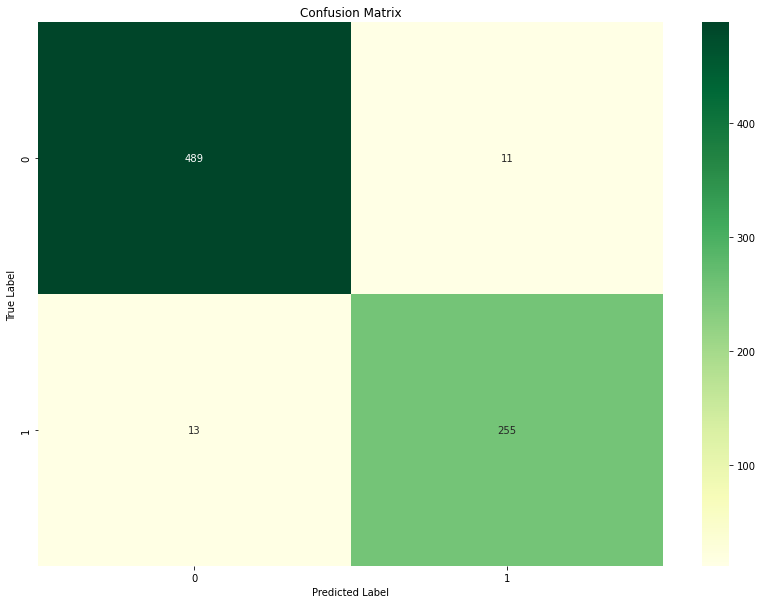

In [73]:
# Evaluate the model
y_pred = new_model.predict(X)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(to_categorical(Y), axis=1)

print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [74]:
sem = np.std(new_model.predict(X), axis=0) / np.sqrt(len(new_model.predict(X)))

print(sem)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
[0.01707086 0.01707087]


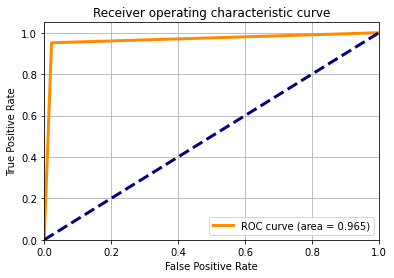

In [75]:
# Binarize the output
Y = label_binarize(Y, classes=[0, 1])

# Get the ROC curve
fpr, tpr, thresholds = roc_curve(Y.ravel(), y_pred.ravel())

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 3
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()
